## Question 11: answer are B and C

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute, IBMQ, transpile

from qiskit.quantum_info import Statevector # the state vector of the required qubits is generated
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere # plot the qubits in a qsphere

import numpy as np
from numpy import pi
import math
from math import sqrt

import matplotlib as mpl
%matplotlib inline

## transpiler
The transpiler uses certain optimization to improve the performance of the circuit.
We can implement more and more abstract operation at the very abstract level, but these quantum circuit cannot be implemented directly to the hardware.
Using transpilation, the specific backend can implement the quantum circuits directly within the hardware limitation.

## Barrier
We place barrier across all qubits to the QuantumCircuit, which can be put between input state and gate operation, or between gate operation and measurement.
We call this barrier operation, an intrstruction of transpiler to separate parts of the operation.
By doing this, we can measure some noises introduced by gates.

## Get our backend `ibm_oslo`

In [2]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q', group = 'open', project = 'main')
backend = provider.get_backend('ibm_oslo')

## Example

We know that it is only identity if two `H` gate operating togehter. Thus, after transpilation, we get "nothing".

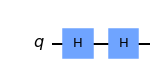

In [3]:
qc0 = QuantumCircuit(1)
qc0.h(0)
qc0.h(0)
qc0.draw()

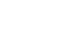

In [4]:
transpile(qc0, backend).draw(output = 'mpl', idle_wires = False)

With the barrier, we can stop the transpiler can see how the gates being transpiled into the native gates available in the chip.
We see that the hardmard gate is decomposed into 2 `Rz` gate and 1 `$\sqrt{x}$` gate.

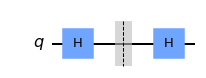

In [5]:
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.barrier()
qc1.h(0)
qc1.draw()

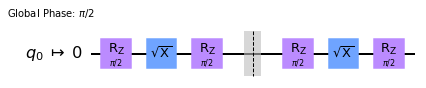

In [6]:
transpile(qc1, backend).draw(output = 'mpl', idle_wires = False)

In [7]:
#We can see the transpiler can still operate on either side of the barrier.

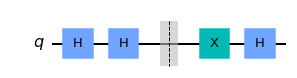

In [8]:
qc2 = QuantumCircuit(1)
qc2.h(0)
qc2.h(0)
qc2.barrier()
qc2.x(0)
qc2.h(0)
qc2.draw()

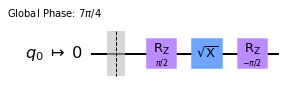

In [11]:
transpile(qc2, backend).draw(output = 'mpl', idle_wires = False)

In T1 experiment, transpilation can help to find the coherent time by measuring the relaxation time of the qubits when putting many `I` gate in `|1>` and observe when it comes to `|0>`.
Without the transpiler, all the `I` gate will combine and you will never see `|0>`
With the transpiler, it will respect all these as a single qubit gate.

## Back to the question

In [13]:
#Create a quantum circuit
qc = QuantumCircuit(3,3)

## Option A

In [ ]:
#qc.barrier(qc) 
#qc.draw(output="mpl")
#error
#"Invalid bit index: 
#'CircuitInstruction(operation=Instruction
#(name='barrier', num_qubits=1, num_clbits=0, params=[]), qubits=(), clbits=())' of type 
#'<class 'qiskit.circuit.quantumcircuitdata.CircuitInstruction'>'"

## Option B

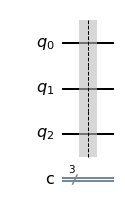

In [14]:
qc.barrier([0,1,2])
qc.draw(output="mpl")

## Option C

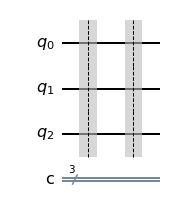

In [15]:
qc.barrier()
qc.draw(output="mpl")

## Option D

In [16]:
#qc.barrier(3)
#qc.draw(output="mpl")
#error, index out of range

## Option E

In [17]:
#qc.barrier_all()
#qc.draw(output="mpl")
#error, no attribute barrier_all, no such command, but only measure_all()

# Reference
1. https://medium.com/arnaldo-gunzi-quantum/what-is-the-barrier-in-qiskit-for-7d1547bebd1
2. https://www.youtube.com/watch?v=tS2CMOyWFMQ&feature=emb_imp_woyt&themeRefresh=1
3. https://www.youtube.com/watch?v=8mrPNSctRIg
4. https://www.youtube.com/watch?v=CdoCPz6TC9k
5. https://www.oreilly.com/library/view/qiskit-pocket-guide/9781098112462/ch04.html
6. https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/aqua/index.ipynb
7. https://github.com/Qiskit/qiskit-tutorials
8. https://github.com/Qiskit/qiskit-ibmq-provider
9. https://www.ibm.com/blogs/research/2019/12/qiskit-openpulse/
10. https://medium.com/qiskit/qiskit-backends-what-they-are-and-how-to-work-with-them-fb66b3bd0463
11. https://medium.com/arnaldo-gunzi-quantum/what-is-the-barrier-in-qiskit-for-7d1547bebd1